In [2]:
import pandas as pd
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
os.chdir('D:\\MY-DOC\\Documents\\Personal\\Kaggle\\restaurant_comp')


### Loading the files

In [4]:
air_reserve=pd.read_csv("air_reserve.csv.zip")
air_store_info=pd.read_csv("air_store_info.csv.zip")
air_visit_data=pd.read_csv("air_visit_data.csv.zip")
date_info=pd.read_csv("date_info.csv.zip")
hpg_reserve=pd.read_csv("hpg_reserve.csv.zip")
hpg_store_info=pd.read_csv("hpg_store_info.csv.zip")
store_id_relation=pd.read_csv("store_id_relation.csv.zip")
sample_submission=pd.read_csv("sample_submission.csv.zip")

In [4]:
sample_submission.tail()

,id,visitors
32014,air_fff68b929994bfbd_2017-05-27,0
32015,air_fff68b929994bfbd_2017-05-28,0
32016,air_fff68b929994bfbd_2017-05-29,0
32017,air_fff68b929994bfbd_2017-05-30,0
32018,air_fff68b929994bfbd_2017-05-31,0


### Basic detail of each file

In [5]:
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [6]:
air_reserve.tail()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
92373,air_db4b38ebe7a7ceff,2017-05-29 18:00:00,2017-04-17 19:00:00,6
92374,air_1033310359ceeac1,2017-05-30 23:00:00,2017-04-19 17:00:00,8
92375,air_877f79706adbfb06,2017-05-31 20:00:00,2017-04-12 23:00:00,3
92376,air_900d755ebd2f7bbd,2017-05-31 20:00:00,2017-04-19 16:00:00,10
92377,air_3cad29d1a23209d2,2017-05-31 21:00:00,2017-04-22 10:00:00,3


In [7]:
air_reserve.describe()

,reserve_visitors
count,92378.000000
mean,4.481749
std,4.919669
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,100.000000


In [8]:
air_store_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [9]:
829*40

33160

In [10]:
air_store_info.describe()

,latitude,longitude
count,829.000000,829.000000
mean,35.647042,137.415311
std,2.084659,3.650971
min,33.211967,130.195555
25%,34.695124,135.341564
50%,35.658068,139.685474
75%,35.694003,139.751599
max,44.020632,144.273398


In [11]:
air_visit_data.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [12]:
air_visit_data.tail()

,air_store_id,visit_date,visitors
252103,air_24e8414b9b07decb,2017-04-18,6
252104,air_24e8414b9b07decb,2017-04-19,6
252105,air_24e8414b9b07decb,2017-04-20,7
252106,air_24e8414b9b07decb,2017-04-21,8
252107,air_24e8414b9b07decb,2017-04-22,5


In [13]:
air_visit_data.describe()

,visitors
count,252108.000000
mean,20.973761
std,16.757007
min,1.000000
25%,9.000000
50%,17.000000
75%,29.000000
max,877.000000


In [14]:
date_info.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [15]:
date_info.tail()

,calendar_date,day_of_week,holiday_flg
512,2017-05-27,Saturday,0
513,2017-05-28,Sunday,0
514,2017-05-29,Monday,0
515,2017-05-30,Tuesday,0
516,2017-05-31,Wednesday,0


In [16]:
date_info.describe()

,holiday_flg
count,517.000000
mean,0.067698
std,0.251471
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [17]:
hpg_reserve.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [18]:
hpg_reserve.describe()

,reserve_visitors
count,2.000320e+06
mean,5.073785e+00
std,5.416172e+00
min,1.000000e+00
25%,2.000000e+00
50%,3.000000e+00
75%,6.000000e+00
max,1.000000e+02


In [19]:
hpg_store_info.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


In [20]:
hpg_store_info.describe()

,latitude,longitude
count,4690.000000,4690.000000
mean,35.810261,137.675816
std,2.138755,3.197233
min,33.311645,130.339313
25%,34.692109,135.498859
50%,35.659214,139.495733
75%,35.703381,139.737998
max,43.774846,143.714585


In [21]:
store_id_relation.head()

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


In [22]:
store_id_relation.describe()

,air_store_id,hpg_store_id
count,150,150
unique,150,150
top,air_a546cbf478a8b6e4,hpg_113fd6e4fa77800f
freq,1,1


### Preliminary checks 


1. Check if any date missing in date_info

In [23]:
start_date=date_info['calendar_date'][0]
end_date=date_info['calendar_date'][len(date_info)-1]
pd.to_datetime(end_date)-pd.to_datetime(start_date)

Timedelta('516 days 00:00:00')

Doesn't seem to be any missing dates

2 Check if restaurant type matches in both datasets

In [24]:
print("AIR - ",air_store_info.air_genre_name.unique())
print("HPG - ",hpg_store_info.hpg_genre_name.unique())

AIR -  ['Italian/French' 'Dining bar' 'Yakiniku/Korean food' 'Cafe/Sweets'
 'Izakaya' 'Okonomiyaki/Monja/Teppanyaki' 'Bar/Cocktail' 'Japanese food'
 'Creative cuisine' 'Other' 'Western food' 'International cuisine' 'Asian'
 'Karaoke/Party']
HPG -  ['Japanese style' 'Italian' 'International cuisine' 'Grilled meat'
 'Creation' 'Shabu-shabu/Sukiyaki' 'Korean cuisine'
 'Creative Japanese food' 'Japanese cuisine/Kaiseki' 'Seafood'
 'Japanese food in general' 'Party' 'Okonomiyaki/Monja/Teppanyaki' 'Sushi'
 'Spain Bar/Italian Bar' 'Chinese general' 'Bistro' 'French' 'Karaoke'
 'Pasta/Pizza' 'Cafe' 'Sweets' 'Steak/Hamburger/Curry'
 'Thai/Vietnamese food' 'Western food' 'Taiwanese/Hong Kong cuisine'
 'Cantonese food' 'Bar/Cocktail' 'Dim Sum/Dumplings' 'Amusement bar'
 'Sichuan food' 'Shanghai food' 'Spain/Mediterranean cuisine' 'Udon/Soba']


Keep both tags, see the most common pairs, decide accordingly.

3 Minimize both datasets to include only common restaurants

In [54]:
#"air_0f0cdeee6c9bf3d7" in list(air_store_info.air_store_id)

True

In [4]:
comm_store_info=pd.DataFrame(columns=["hpg_store_id","reserve_datetime","reserve_visitors","visit_datetime"])
i=0
for i in range(len(store_id_relation)):
    a=store_id_relation.loc[i,"air_store_id"]
    b=store_id_relation.loc[i,"hpg_store_id"]
    #print(a,b)
    if a in list(air_store_info.air_store_id):
#    x=pd.Series(hpg_reserve[hpg_reserve.hpg_store_id==b],index=["a","b","c","d"])
        comm_store_info=comm_store_info.append(hpg_reserve[hpg_reserve.hpg_store_id==b])
        


In [147]:
comm_store_info.head()

,hpg_store_id,reserve_datetime,reserve_visitors,visit_datetime
1772,hpg_4bc649e72e2a239a,2016-01-03 14:00:00,7,2016-01-04 12:00:00
1805,hpg_4bc649e72e2a239a,2016-01-02 13:00:00,4,2016-01-04 14:00:00
2500,hpg_4bc649e72e2a239a,2016-01-01 08:00:00,3,2016-01-05 12:00:00
7457,hpg_4bc649e72e2a239a,2016-01-07 20:00:00,6,2016-01-09 12:00:00
12980,hpg_4bc649e72e2a239a,2016-01-10 15:00:00,3,2016-01-11 12:00:00


In [49]:
#hpg_data=pd.DataFrame(comm_store_info,index="1")

In [5]:
comm_store_info=comm_store_info.rename(columns={'hpg_store_id':'air_store_id'})
reserve=air_reserve.append(comm_store_info)
reserve=reserve.reset_index()

In [149]:
reserve.head()

,index,air_store_id,reserve_datetime,reserve_visitors,visit_datetime
0,0,air_877f79706adbfb06,2016-01-01 16:00:00,1,2016-01-01 19:00:00
1,1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,3,2016-01-01 19:00:00
2,2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,6,2016-01-01 19:00:00
3,3,air_877f79706adbfb06,2016-01-01 16:00:00,2,2016-01-01 20:00:00
4,4,air_db80363d35f10926,2016-01-01 01:00:00,5,2016-01-01 20:00:00


In [153]:
reserve.nunique()

index               119031
air_store_id           464
reserve_datetime      9386
reserve_visitors        74
visit_datetime        5973
time_gap              2489
reserve_date           478
visit_date             517
dtype: int64

In [103]:
# reserve['air']=0
# # for i in range(len(reserve)):
#     reserve.loc[i,"air"]=reserve.loc[i,"air_store_id"][0]

KeyboardInterrupt: 

In [106]:
reserve.dtypes

index                int64
air_store_id        object
reserve_datetime    object
reserve_visitors    object
visit_datetime      object
air                 object
dtype: object

In [6]:
reserve['reserve_datetime']=pd.to_datetime(reserve.reserve_datetime)
reserve['visit_datetime']=pd.to_datetime(reserve.visit_datetime)
reserve['time_gap']=reserve.visit_datetime-reserve.reserve_datetime
reserve.head()

,index,air_store_id,reserve_datetime,reserve_visitors,visit_datetime,time_gap
0,0,air_877f79706adbfb06,2016-01-01 16:00:00,1,2016-01-01 19:00:00,03:00:00
1,1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,3,2016-01-01 19:00:00,00:00:00
2,2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,6,2016-01-01 19:00:00,00:00:00
3,3,air_877f79706adbfb06,2016-01-01 16:00:00,2,2016-01-01 20:00:00,04:00:00
4,4,air_db80363d35f10926,2016-01-01 01:00:00,5,2016-01-01 20:00:00,19:00:00


In [151]:
reserve.dtypes

index                         int64
air_store_id                 object
reserve_datetime     datetime64[ns]
reserve_visitors             object
visit_datetime       datetime64[ns]
time_gap            timedelta64[ns]
dtype: object

In [7]:
reserve['reserve_date']=pd.to_datetime(reserve['reserve_datetime'].apply(lambda x:x.date()))
reserve['visit_date']=pd.to_datetime(reserve['visit_datetime'].apply(lambda x:x.date()))

In [39]:
reserve.head()

,index,air_store_id,reserve_datetime,reserve_visitors,visit_datetime,time_gap,reserve_date,visit_date
0,0,air_877f79706adbfb06,2016-01-01 16:00:00,1,2016-01-01 19:00:00,03:00:00,2016-01-01,2016-01-01
1,1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,3,2016-01-01 19:00:00,00:00:00,2016-01-01,2016-01-01
2,2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,6,2016-01-01 19:00:00,00:00:00,2016-01-01,2016-01-01
3,3,air_877f79706adbfb06,2016-01-01 16:00:00,2,2016-01-01 20:00:00,04:00:00,2016-01-01,2016-01-01
4,4,air_db80363d35f10926,2016-01-01 01:00:00,5,2016-01-01 20:00:00,19:00:00,2016-01-01,2016-01-01


In [21]:
date_info.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [8]:
date_info['calendar_date']=pd.to_datetime(date_info.calendar_date)
# Make date format same for both
reserve=pd.merge(reserve,date_info,left_on="reserve_date",right_on="calendar_date",how="left")

In [9]:
reserve=reserve.rename(columns={'day_of_week':'reserve_day','holiday_flg':'reserve_holiday'})

In [51]:
reserve.head()

,index,air_store_id,reserve_datetime,reserve_visitors,visit_datetime,time_gap,reserve_date,visit_date,calendar_date_x,reserve_day,reserve_holiday,calendar_date_y,visit_day,visit_holiday
0,0,air_877f79706adbfb06,2016-01-01 16:00:00,1,2016-01-01 19:00:00,03:00:00,2016-01-01,2016-01-01,2016-01-01,Friday,1,2016-01-01,Friday,1
1,1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,3,2016-01-01 19:00:00,00:00:00,2016-01-01,2016-01-01,2016-01-01,Friday,1,2016-01-01,Friday,1
2,2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,6,2016-01-01 19:00:00,00:00:00,2016-01-01,2016-01-01,2016-01-01,Friday,1,2016-01-01,Friday,1
3,3,air_877f79706adbfb06,2016-01-01 16:00:00,2,2016-01-01 20:00:00,04:00:00,2016-01-01,2016-01-01,2016-01-01,Friday,1,2016-01-01,Friday,1
4,4,air_db80363d35f10926,2016-01-01 01:00:00,5,2016-01-01 20:00:00,19:00:00,2016-01-01,2016-01-01,2016-01-01,Friday,1,2016-01-01,Friday,1


In [10]:
reserve=pd.merge(reserve,date_info,left_on="visit_date",right_on="calendar_date",how="left")
reserve=reserve.rename(columns={'day_of_week':'visit_day','holiday_flg':'visit_holiday'})

In [11]:
reserve=reserve.drop(['calendar_date_x','calendar_date_y'],axis=1)

In [12]:
reserve['day_gap']=reserve.time_gap.dt.days

In [13]:
reserve['seconds_gap']=reserve.time_gap.dt.seconds

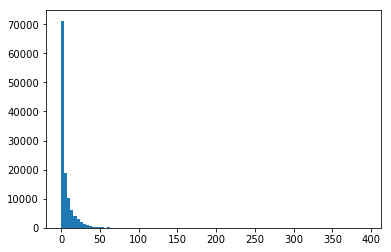

In [66]:
plt.hist(reserve.day_gap,bins=100)
plt.show()

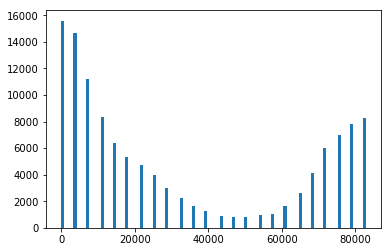

In [67]:
plt.hist(reserve.seconds_gap,bins=100)
plt.show()

In [14]:
reserve['year']=reserve.visit_date.dt.year
reserve['month']=reserve.visit_date.dt.month
reserve['day']=reserve.visit_date.dt.day

In [73]:
reserve.tail()

,index,air_store_id,reserve_datetime,reserve_visitors,visit_datetime,time_gap,reserve_date,visit_date,reserve_day,reserve_holiday,visit_day,visit_holiday,day_gap,seconds_gap,year,month,day
120556,1889708,hpg_23c5945dc1a72454,2017-03-23 20:00:00,23,2017-04-10 19:00:00,17 days 23:00:00,2017-03-23,2017-04-10,Thursday,0,Monday,0,17,82800,2017,4,10
120557,1942349,hpg_23c5945dc1a72454,2017-04-17 16:00:00,8,2017-04-21 12:00:00,3 days 20:00:00,2017-04-17,2017-04-21,Monday,0,Friday,0,3,72000,2017,4,21
120558,1976889,hpg_23c5945dc1a72454,2017-04-18 09:00:00,4,2017-04-27 18:00:00,9 days 09:00:00,2017-04-18,2017-04-27,Tuesday,0,Thursday,0,9,32400,2017,4,27
120559,1981180,hpg_23c5945dc1a72454,2017-04-19 13:00:00,15,2017-04-28 19:00:00,9 days 06:00:00,2017-04-19,2017-04-28,Wednesday,0,Friday,0,9,21600,2017,4,28
120560,1990505,hpg_23c5945dc1a72454,2017-04-12 21:00:00,2,2017-05-02 19:00:00,19 days 22:00:00,2017-04-12,2017-05-02,Wednesday,0,Tuesday,0,19,79200,2017,5,2


,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


In [75]:
store_id_relation.head()

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


In [15]:
reserve=pd.merge(reserve,store_id_relation,how="left",left_on="air_store_id",right_on="hpg_store_id")

In [163]:
reserve.count()

index               120561
air_store_id_x      120561
reserve_datetime    120561
reserve_visitors    120561
visit_datetime      120561
time_gap            120561
reserve_date        120561
visit_date          120561
reserve_day         120561
reserve_holiday     120561
visit_day           120561
visit_holiday       120561
day_gap             120561
seconds_gap         120561
air_store_id_y       28183
hpg_store_id         28183
dtype: int64

In [80]:
reserve.tail()

,index,air_store_id_x,reserve_datetime,reserve_visitors,visit_datetime,time_gap,reserve_date,visit_date,reserve_day,reserve_holiday,visit_day,visit_holiday,day_gap,seconds_gap,year,month,day,air_store_id_y,hpg_store_id
120556,1889708,hpg_23c5945dc1a72454,2017-03-23 20:00:00,23,2017-04-10 19:00:00,17 days 23:00:00,2017-03-23,2017-04-10,Thursday,0,Monday,0,17,82800,2017,4,10,air_465bddfed3353b23,hpg_23c5945dc1a72454
120557,1942349,hpg_23c5945dc1a72454,2017-04-17 16:00:00,8,2017-04-21 12:00:00,3 days 20:00:00,2017-04-17,2017-04-21,Monday,0,Friday,0,3,72000,2017,4,21,air_465bddfed3353b23,hpg_23c5945dc1a72454
120558,1976889,hpg_23c5945dc1a72454,2017-04-18 09:00:00,4,2017-04-27 18:00:00,9 days 09:00:00,2017-04-18,2017-04-27,Tuesday,0,Thursday,0,9,32400,2017,4,27,air_465bddfed3353b23,hpg_23c5945dc1a72454
120559,1981180,hpg_23c5945dc1a72454,2017-04-19 13:00:00,15,2017-04-28 19:00:00,9 days 06:00:00,2017-04-19,2017-04-28,Wednesday,0,Friday,0,9,21600,2017,4,28,air_465bddfed3353b23,hpg_23c5945dc1a72454
120560,1990505,hpg_23c5945dc1a72454,2017-04-12 21:00:00,2,2017-05-02 19:00:00,19 days 22:00:00,2017-04-12,2017-05-02,Wednesday,0,Tuesday,0,19,79200,2017,5,2,air_465bddfed3353b23,hpg_23c5945dc1a72454


In [16]:
reserve_t1=reserve[pd.isnull(reserve.air_store_id_y)==False]

In [17]:
reserve_t1.head()

,index,air_store_id_x,reserve_datetime,reserve_visitors,visit_datetime,time_gap,reserve_date,visit_date,reserve_day,reserve_holiday,visit_day,visit_holiday,day_gap,seconds_gap,year,month,day,air_store_id_y,hpg_store_id
92378,1772,hpg_4bc649e72e2a239a,2016-01-03 14:00:00,7,2016-01-04 12:00:00,0 days 22:00:00,2016-01-03,2016-01-04,Sunday,1,Monday,0,0,79200,2016,1,4,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
92379,1805,hpg_4bc649e72e2a239a,2016-01-02 13:00:00,4,2016-01-04 14:00:00,2 days 01:00:00,2016-01-02,2016-01-04,Saturday,1,Monday,0,2,3600,2016,1,4,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
92380,2500,hpg_4bc649e72e2a239a,2016-01-01 08:00:00,3,2016-01-05 12:00:00,4 days 04:00:00,2016-01-01,2016-01-05,Friday,1,Tuesday,0,4,14400,2016,1,5,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
92381,7457,hpg_4bc649e72e2a239a,2016-01-07 20:00:00,6,2016-01-09 12:00:00,1 days 16:00:00,2016-01-07,2016-01-09,Thursday,0,Saturday,0,1,57600,2016,1,9,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
92382,12980,hpg_4bc649e72e2a239a,2016-01-10 15:00:00,3,2016-01-11 12:00:00,0 days 21:00:00,2016-01-10,2016-01-11,Sunday,0,Monday,1,0,75600,2016,1,11,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a


In [165]:
reserve_t1=reserve_t1.rename(columns={'air_store_id_y':'air_store_id'})
reserve_t1=reserve_t1.drop(['air_store_id_x','hpg_store_id'],axis=1)

In [100]:
reserve_t1.describe()

,index,time_gap,reserve_holiday,visit_holiday,day_gap,seconds_gap,year,month,day
count,2.818300e+04,28183,28183.000000,28183.000000,28183.000000,28183.000000,28183.000000,28183.000000,28183.000000
mean,9.387863e+05,6 days 19:30:17.180569,0.054856,0.069475,6.355853,39471.497002,2016.289643,5.978356,16.688855
std,5.774804e+05,8 days 10:08:17.983497,0.227703,0.254264,8.417555,29762.772347,0.453605,3.780831,8.595666
min,1.030000e+02,0 days 00:00:00,0.000000,0.000000,0.000000,0.000000,2016.000000,1.000000,1.000000
25%,4.369180e+05,1 days 08:00:00,0.000000,0.000000,1.000000,10800.000000,2016.000000,3.000000,10.000000
50%,9.002640e+05,3 days 21:00:00,0.000000,0.000000,3.000000,32400.000000,2016.000000,5.000000,17.000000
75%,1.433706e+06,9 days 00:00:00,0.000000,0.000000,9.000000,72000.000000,2017.000000,10.000000,24.000000
max,2.000313e+06,99 days 22:00:00,1.000000,1.000000,99.000000,82800.000000,2017.000000,12.000000,31.000000


In [18]:
reserve_t2=reserve[pd.isnull(reserve.air_store_id_y)==True]
reserve_t2.describe()

,index,time_gap,reserve_holiday,visit_holiday,day_gap,seconds_gap,year,month,day
count,92378.000000,92378,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.000000,92378.00000
mean,46188.500000,8 days 07:05:51.044621,0.047046,0.066228,7.942107,30552.962827,2016.509656,5.506398,16.19641
std,26667.375921,25 days 15:39:45.896814,0.211738,0.248681,25.630276,31000.837534,0.499909,4.229256,8.63795
min,0.000000,0 days 00:00:00,0.000000,0.000000,0.000000,0.000000,2016.000000,1.000000,1.00000
25%,23094.250000,0 days 05:00:00,0.000000,0.000000,0.000000,3600.000000,2016.000000,2.000000,9.00000
50%,46188.500000,2 days 02:00:00,0.000000,0.000000,2.000000,14400.000000,2017.000000,4.000000,17.00000
75%,69282.750000,7 days 21:00:00,0.000000,0.000000,7.000000,68400.000000,2017.000000,11.000000,24.00000
max,92377.000000,393 days 03:00:00,1.000000,1.000000,393.000000,82800.000000,2017.000000,12.000000,31.00000


In [19]:
reserve_t2=reserve_t2.rename(columns={'air_store_id_x':'air_store_id'})
reserve_t2=reserve_t2.drop(['air_store_id_y','hpg_store_id'],axis=1)

In [103]:
reserve_t2.tail()

,index,air_store_id,reserve_datetime,reserve_visitors,visit_datetime,time_gap,reserve_date,visit_date,reserve_day,reserve_holiday,visit_day,visit_holiday,day_gap,seconds_gap,year,month,day
92373,92373,air_db4b38ebe7a7ceff,2017-04-17 19:00:00,6,2017-05-29 18:00:00,41 days 23:00:00,2017-04-17,2017-05-29,Monday,0,Monday,0,41,82800,2017,5,29
92374,92374,air_1033310359ceeac1,2017-04-19 17:00:00,8,2017-05-30 23:00:00,41 days 06:00:00,2017-04-19,2017-05-30,Wednesday,0,Tuesday,0,41,21600,2017,5,30
92375,92375,air_877f79706adbfb06,2017-04-12 23:00:00,3,2017-05-31 20:00:00,48 days 21:00:00,2017-04-12,2017-05-31,Wednesday,0,Wednesday,0,48,75600,2017,5,31
92376,92376,air_900d755ebd2f7bbd,2017-04-19 16:00:00,10,2017-05-31 20:00:00,42 days 04:00:00,2017-04-19,2017-05-31,Wednesday,0,Wednesday,0,42,14400,2017,5,31
92377,92377,air_3cad29d1a23209d2,2017-04-22 10:00:00,3,2017-05-31 21:00:00,39 days 11:00:00,2017-04-22,2017-05-31,Saturday,0,Wednesday,0,39,39600,2017,5,31


In [20]:
reservef=reserve_t1.append(reserve_t2)

In [169]:
reservef.describe()

,day_gap,index,reserve_holiday,seconds_gap,time_gap,visit_holiday
count,120561.000000,1.205610e+05,120561.000000,120561.000000,120561,120561.000000
mean,7.571296,2.548471e+05,0.048872,32637.808246,7 days 22:46:37.770423,0.066987
std,22.811409,4.703304e+05,0.215600,30946.820862,22 days 19:54:56.362344,0.250000
min,0.000000,0.000000e+00,0.000000,0.000000,0 days 00:00:00,0.000000
25%,0.000000,2.962100e+04,0.000000,3600.000000,0 days 15:00:00,0.000000
50%,2.000000,5.929200e+04,0.000000,18000.000000,2 days 19:00:00,0.000000
75%,8.000000,8.894400e+04,0.000000,68400.000000,8 days 01:00:00,0.000000
max,393.000000,2.000313e+06,1.000000,82800.000000,393 days 03:00:00,1.000000


In [170]:
reservef.nunique()

air_store_id           333
day_gap                372
index               119031
reserve_date           478
reserve_datetime      9386
reserve_day              7
reserve_holiday          2
reserve_visitors        74
seconds_gap             24
time_gap              2489
visit_date             517
visit_datetime        5973
visit_day                7
visit_holiday            2
dtype: int64

In [121]:
reservef.sort_values(by='visit_date')

,air_store_id,day,day_gap,index,month,reserve_date,reserve_datetime,reserve_day,reserve_holiday,reserve_visitors,seconds_gap,time_gap,visit_date,visit_datetime,visit_day,visit_holiday,year
0,air_877f79706adbfb06,1,0,0,1,2016-01-01,2016-01-01 16:00:00,Friday,1,1,10800,0 days 03:00:00,2016-01-01,2016-01-01 19:00:00,Friday,1,2016
108397,air_db80363d35f10926,1,0,103,1,2016-01-01,2016-01-01 15:00:00,Friday,1,4,14400,0 days 04:00:00,2016-01-01,2016-01-01 19:00:00,Friday,1,2016
4,air_db80363d35f10926,1,0,4,1,2016-01-01,2016-01-01 01:00:00,Friday,1,5,68400,0 days 19:00:00,2016-01-01,2016-01-01 20:00:00,Friday,1,2016
3,air_877f79706adbfb06,1,0,3,1,2016-01-01,2016-01-01 16:00:00,Friday,1,2,14400,0 days 04:00:00,2016-01-01,2016-01-01 20:00:00,Friday,1,2016
2,air_db4b38ebe7a7ceff,1,0,2,1,2016-01-01,2016-01-01 19:00:00,Friday,1,6,0,0 days 00:00:00,2016-01-01,2016-01-01 19:00:00,Friday,1,2016
1,air_db4b38ebe7a7ceff,1,0,1,1,2016-01-01,2016-01-01 19:00:00,Friday,1,3,0,0 days 00:00:00,2016-01-01,2016-01-01 19:00:00,Friday,1,2016
118873,air_08cb3c4ee6cd6a22,1,0,121,1,2016-01-01,2016-01-01 16:00:00,Friday,1,2,10800,0 days 03:00:00,2016-01-01,2016-01-01 19:00:00,Friday,1,2016
17,air_2b8b29ddfd35018e,2,0,17,1,2016-01-02,2016-01-02 17:00:00,Saturday,1,2,3600,0 days 01:00:00,2016-01-02,2016-01-02 18:00:00,Saturday,1,2016
18,air_6b15edd1b4fbb96a,2,1,18,1,2016-01-01,2016-01-01 12:00:00,Friday,1,3,21600,1 days 06:00:00,2016-01-02,2016-01-02 18:00:00,Saturday,1,2016
19,air_877f79706adbfb06,2,1,19,1,2016-01-01,2016-01-01 16:00:00,Friday,1,2,7200,1 days 02:00:00,2016-01-02,2016-01-02 18:00:00,Saturday,1,2016


In [21]:
no_of_res=reservef.groupby(['visit_date','air_store_id']).day.count()

In [135]:
no_of_res

visit_date  air_store_id        
2016-01-01  air_08cb3c4ee6cd6a22     1
            air_877f79706adbfb06     2
            air_db4b38ebe7a7ceff     2
            air_db80363d35f10926     2
2016-01-02  air_08cb3c4ee6cd6a22     2
            air_1033310359ceeac1     1
            air_2b8b29ddfd35018e     3
            air_37189c92b6c761ec     5
            air_375a5241615b5e22     1
            air_3bb99a1fe0583897     2
            air_6b15edd1b4fbb96a     7
            air_7420042ff75f9aca     1
            air_789466e488705c93     4
            air_877f79706adbfb06     2
            air_8e492076a1179383     1
            air_c1ff20617c54fee7     1
            air_db80363d35f10926    10
            air_f690c42545146e0a     1
2016-01-03  air_08cb3c4ee6cd6a22     1
            air_2a485b92210c98b5     4
            air_326ca454ef3558bc     3
            air_32c61b620a766138     1
            air_37189c92b6c761ec     1
            air_3c938075889fc059     2
            air_5c7489c9ec755e2

In [137]:
air_visit_data.nunique()

air_store_id    829
visit_date      478
visitors        204
dtype: int64

In [140]:
reservef.nunique()

air_store_id           333
day                     31
day_gap                372
index               119031
month                   12
reserve_date           478
reserve_datetime      9386
reserve_day              7
reserve_holiday          2
reserve_visitors        74
seconds_gap             24
time_gap              2489
visit_date             517
visit_datetime        5973
visit_day                7
visit_holiday            2
year                     2
dtype: int64

In [141]:
air_reserve.nunique()

air_store_id         314
visit_datetime      4975
reserve_datetime    7513
reserve_visitors      71
dtype: int64

Hopefully, the disparity is because some restuarants are exclusively on hpg. Checking -

In [172]:
pd.merge(store_id_relation,air_reserve).nunique()

air_store_id         131
hpg_store_id         131
visit_datetime      3658
reserve_datetime    5573
reserve_visitors      60
dtype: int64

In [173]:
store_id_relation.nunique()

air_store_id    150
hpg_store_id    150
dtype: int64

In [174]:
314+19

333

19 restaurants are exlcusively on HPG.

In [22]:
no_res=reservef.groupby(['air_store_id','visit_date']).count().day_gap

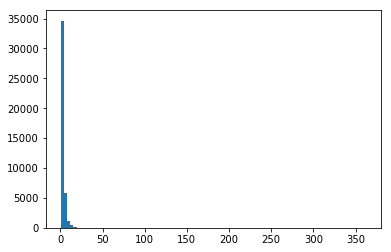

In [189]:
plt.hist(no_res,bins=100)
plt.show()

In [193]:
no_res[no_res==362]

air_store_id          visit_date
air_a17f0778617c76e2  2016-11-10    362
Name: day_gap, dtype: int64

In [287]:
reservef[reservef.air_store_id=="air_7831b00996701c0f"]

,air_store_id,day_gap,index,reserve_date,reserve_datetime,reserve_day,reserve_holiday,reserve_visitors,seconds_gap,time_gap,visit_date,visit_datetime,visit_day,visit_holiday
144,air_7831b00996701c0f,0,144,2016-01-07,2016-01-07 15:00:00,Thursday,0,2,3600,0 days 01:00:00,2016-01-07,2016-01-07 16:00:00,Thursday,0
150,air_7831b00996701c0f,1,150,2016-01-05,2016-01-05 20:00:00,Tuesday,0,2,75600,1 days 21:00:00,2016-01-07,2016-01-07 17:00:00,Thursday,0
168,air_7831b00996701c0f,1,168,2016-01-05,2016-01-05 22:00:00,Tuesday,0,19,75600,1 days 21:00:00,2016-01-07,2016-01-07 19:00:00,Thursday,0
169,air_7831b00996701c0f,0,169,2016-01-07,2016-01-07 12:00:00,Thursday,0,4,25200,0 days 07:00:00,2016-01-07,2016-01-07 19:00:00,Thursday,0
234,air_7831b00996701c0f,0,234,2016-01-08,2016-01-08 17:00:00,Friday,0,4,7200,0 days 02:00:00,2016-01-08,2016-01-08 19:00:00,Friday,0
311,air_7831b00996701c0f,0,311,2016-01-08,2016-01-08 21:00:00,Friday,0,2,68400,0 days 19:00:00,2016-01-09,2016-01-09 16:00:00,Saturday,0
350,air_7831b00996701c0f,1,350,2016-01-07,2016-01-07 22:00:00,Thursday,0,4,72000,1 days 20:00:00,2016-01-09,2016-01-09 18:00:00,Saturday,0
372,air_7831b00996701c0f,6,372,2016-01-03,2016-01-03 09:00:00,Sunday,1,4,36000,6 days 10:00:00,2016-01-09,2016-01-09 19:00:00,Saturday,0
373,air_7831b00996701c0f,0,373,2016-01-09,2016-01-09 11:00:00,Saturday,0,2,28800,0 days 08:00:00,2016-01-09,2016-01-09 19:00:00,Saturday,0
415,air_7831b00996701c0f,1,415,2016-01-08,2016-01-08 13:00:00,Friday,0,2,36000,1 days 10:00:00,2016-01-09,2016-01-09 23:00:00,Saturday,0


Must have been store opening...

In [286]:
(air_visit_data[air_visit_data.air_store_id=="air_7831b00996701c0f"]).sort_values('visit_date')

,air_store_id,visit_date,visitors
211706,air_7831b00996701c0f,2016-01-07,26
211707,air_7831b00996701c0f,2016-01-08,19
211708,air_7831b00996701c0f,2016-01-09,22
211709,air_7831b00996701c0f,2016-01-10,21
211710,air_7831b00996701c0f,2016-01-11,3
211711,air_7831b00996701c0f,2016-01-12,6
211712,air_7831b00996701c0f,2016-01-13,11
211713,air_7831b00996701c0f,2016-01-14,20
211714,air_7831b00996701c0f,2016-01-15,20
211715,air_7831b00996701c0f,2016-01-16,25


In [202]:
air_reserve[air_reserve.air_store_id=="air_a17f0778617c76e2"]

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
20780,air_a17f0778617c76e2,2016-11-10 14:00:00,2016-10-13 16:00:00,6
20781,air_a17f0778617c76e2,2016-11-10 14:00:00,2016-10-24 12:00:00,57
20863,air_a17f0778617c76e2,2016-11-10 18:00:00,2016-09-09 20:00:00,6
20864,air_a17f0778617c76e2,2016-11-10 18:00:00,2016-10-27 16:00:00,3
20865,air_a17f0778617c76e2,2016-11-10 18:00:00,2016-10-26 23:00:00,2
20866,air_a17f0778617c76e2,2016-11-10 18:00:00,2016-10-04 19:00:00,5
20867,air_a17f0778617c76e2,2016-11-10 18:00:00,2016-08-23 21:00:00,2
20868,air_a17f0778617c76e2,2016-11-10 18:00:00,2016-09-01 17:00:00,2
20869,air_a17f0778617c76e2,2016-11-10 18:00:00,2016-09-24 21:00:00,4
20870,air_a17f0778617c76e2,2016-11-10 18:00:00,2016-08-17 20:00:00,10


In [23]:
start_date=air_visit_data.groupby('air_store_id').visit_date.min()

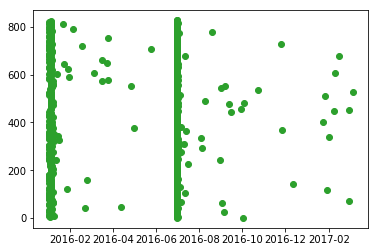

In [223]:
plt.plot_date(start_date,range(829))
plt.show()

In [224]:
end_date=air_visit_data.groupby('air_store_id').visit_date.max()

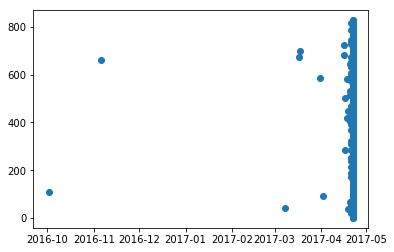

In [225]:
plt.plot_date(end_date,range(829))
plt.show()

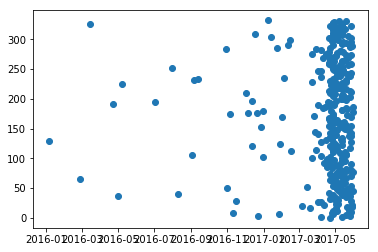

In [228]:
r_end_date=reservef.groupby('air_store_id').visit_date.max()
plt.plot_date(r_end_date,range(333))
plt.show()

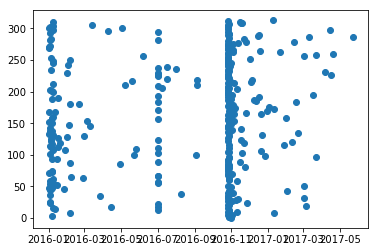

In [253]:
r_start_date=reserve_t2.groupby('air_store_id').visit_date.min()
plt.plot_date(r_start_date,range(314))
plt.show()

In [231]:
plt.plot_date?

In [254]:
r_start_date.value_counts()

2016-10-27    68
2016-10-28    25
2016-10-29    18
2016-07-01    17
2016-01-04    11
2016-01-08     9
2016-01-05     8
2016-01-06     7
2016-11-02     5
2016-01-02     5
2016-11-04     5
2016-07-02     5
2016-11-01     4
2016-01-09     4
2016-01-03     4
2016-01-07     4
2017-03-03     3
2016-01-01     3
2016-02-05     3
2016-10-31     3
2016-09-05     2
2016-11-16     2
2016-12-17     2
2017-01-11     2
2016-11-10     2
2016-10-26     2
2016-11-06     2
2016-11-25     2
2016-11-12     2
2016-01-16     2
              ..
2016-04-29     1
2016-02-27     1
2016-12-16     1
2016-12-30     1
2017-04-16     1
2016-04-09     1
2016-12-27     1
2016-02-21     1
2016-12-05     1
2016-02-02     1
2016-11-22     1
2016-11-07     1
2016-01-17     1
2016-01-31     1
2016-12-20     1
2017-03-06     1
2017-01-03     1
2017-02-10     1
2016-01-11     1
2017-04-20     1
2017-02-17     1
2016-10-30     1
2016-03-27     1
2017-02-14     1
2016-02-08     1
2017-01-28     1
2016-08-09     1
2016-11-24    

In [271]:
import tqdm

In [24]:
#print(reservef.shape)
li=[]
for i in start_date.index:
    j=pd.to_datetime(start_date[i])
    #print(i)
    temp=reservef.drop(reservef[(reservef.air_store_id!=i) | (reservef.visit_date >= j)].index)
    li.append(temp.shape[0])
    #print(temp.shape)
    #reservef.drop((reservef[reservef.visit_date < j]) & (reservef[reservef.air_store_id == i]))

In [300]:
li

[30,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 122,
 0,
 0,
 0,
 0,
 36,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 67,
 0,
 85,
 23,
 0,
 0,
 0,
 44,
 0,
 0,
 102,
 0,
 46,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 28,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 38,
 18,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 354,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 27,
 0,
 52,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 13,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 116,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 15,
 56,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 12,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 68,
 0,
 0,
 0,
 0,
 52,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 183,
 45,
 0,
 0,
 13,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 75,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 107,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 178,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


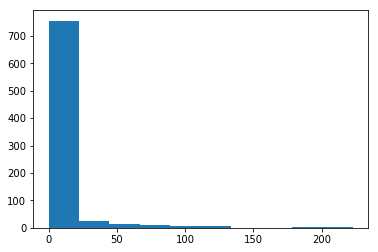

In [306]:
li1=[i for i in li if i<250]
plt.hist(li1)
plt.show()

A lot of restaurants have faulty reservations (or no-shows).

In [25]:
li=[]
for i in start_date.index:
    j=pd.to_datetime(start_date[i])
    #print(i)
    temp=reservef.drop(reservef[(reservef.air_store_id!=i) | (reservef.visit_date >= j)].index)
    if len(list(temp.index)) > 100:
    #Arbitrary, can be changed
        li.append(list(temp.index))

In [26]:
from itertools import chain
li = list(chain.from_iterable(li))


In [27]:
reservef=reservef.drop(li)

The above *reservef* has the faulty entries removed.

In [28]:
reservef['same_day']=reservef.apply(lambda x: 1 if x['reserve_date'] == x['visit_date'] else 0,axis=1)

In [380]:
reservef.head()

,air_store_id,day_gap,index,reserve_date,reserve_datetime,reserve_day,reserve_holiday,reserve_visitors,seconds_gap,time_gap,visit_date,visit_datetime,visit_day,visit_holiday,same_day
92378,air_63b13c56b7201bd9,0,1772,2016-01-03,2016-01-03 14:00:00,Sunday,1,7,79200,0 days 22:00:00,2016-01-04,2016-01-04 12:00:00,Monday,0,0
92379,air_63b13c56b7201bd9,2,1805,2016-01-02,2016-01-02 13:00:00,Saturday,1,4,3600,2 days 01:00:00,2016-01-04,2016-01-04 14:00:00,Monday,0,0
92380,air_63b13c56b7201bd9,4,2500,2016-01-01,2016-01-01 08:00:00,Friday,1,3,14400,4 days 04:00:00,2016-01-05,2016-01-05 12:00:00,Tuesday,0,0
92381,air_63b13c56b7201bd9,1,7457,2016-01-07,2016-01-07 20:00:00,Thursday,0,6,57600,1 days 16:00:00,2016-01-09,2016-01-09 12:00:00,Saturday,0,0
92382,air_63b13c56b7201bd9,0,12980,2016-01-10,2016-01-10 15:00:00,Sunday,0,3,75600,0 days 21:00:00,2016-01-11,2016-01-11 12:00:00,Monday,1,0


In [29]:
num_res_visitors=reservef.groupby(['air_store_id','visit_date']).reserve_visitors.sum()

In [30]:
num_reservations=reservef.groupby(['air_store_id','visit_date']).reserve_day.count()

In [358]:
num_reservations.head()

air_store_id          visit_date
air_00a91d42b08b08d9  2016-07-01    1
                      2016-07-06    1
                      2016-07-08    1
                      2016-07-09    1
                      2016-07-13    1
Name: reserve_day, dtype: int64

In [31]:
date=reservef.groupby(['air_store_id','visit_date']).visit_date.first()
#holiday=reservef.groupby(['air_store_id','visit_date']).visit_holiday.first()

In [32]:
same_day=reservef.groupby(['air_store_id','visit_date']).same_day.sum()

In [33]:
def convert_format(a):
    x=pd.DataFrame(a)
    x=x.reset_index(level=[0,1])
    x['ind']=x.air_store_id.astype(str).str.cat(x.visit_date.astype(str), sep='_')
    return(x.drop(['air_store_id','visit_date'],axis=1))

In [34]:
num_res_visitors=convert_format(num_res_visitors)
num_reservations=convert_format(num_reservations)

In [35]:
same_day=convert_format(same_day)

In [36]:
x=pd.DataFrame(date)
x=x.rename(columns={'visit_date':'vd'})
x=x.reset_index(level=[0,1])
x['ind']=x.air_store_id.astype(str).str.cat(x.visit_date.astype(str), sep='_')
date1=x.drop(['air_store_id','visit_date'],axis=1)

In [385]:
air_visit_data.head()

,air_store_id,visit_date,visitors,ind
0,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13
1,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14
2,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15
3,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16
4,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18


In [184]:
air_visit_data=pd.read_csv("air_visit_data.csv.zip")
air_visit_data['ind']=air_visit_data.air_store_id.astype(str).str.cat(air_visit_data.visit_date.astype(str), sep='_')
air_visit_data['visit_date']=pd.to_datetime(air_visit_data['visit_date'])
air_visit_data=pd.merge(air_visit_data,date_info,left_on="visit_date",right_on="calendar_date",how="left")
air_visit_data['month']=air_visit_data.visit_date.dt.month
air_visit_data['day']=air_visit_data.visit_date.dt.day
air_visit_data['year']=air_visit_data.visit_date.dt.year
air_visit=air_visit_data.drop(['visit_date','calendar_date'],axis=1)

In [163]:
air_visit_data.head()

,air_store_id,visit_date,visitors,ind,calendar_date,day_of_week,holiday_flg,month,day,year
0,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13,2016-01-13,Wednesday,0,1,13,2016
1,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14,2016-01-14,Thursday,0,1,14,2016
2,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15,2016-01-15,Friday,0,1,15,2016
3,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16,2016-01-16,Saturday,0,1,16,2016
4,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18,2016-01-18,Monday,0,1,18,2016


In [185]:
avg_visitors=air_visit_data.groupby('air_store_id').visitors.mean()

In [190]:
avg_visitors1=pd.DataFrame(avg_visitors)
avg_visitors1=avg_visitors1.rename(columns={'visitors':'avg_visitors'})
#air_visit=pd.merge(air_visit,avg_visitors1,how="left")
avg_visitors1['air_store_id']=avg_visitors1.index
air_visit=pd.merge(air_visit,avg_visitors1,how="left")

In [191]:
air_visit=pd.merge(air_visit,num_res_visitors,how="left")

In [194]:
air_visit=pd.merge(air_visit,num_reservations,how="left")
air_visit=pd.merge(air_visit,same_day,how="left")
air_visit=air_visit.drop('air_store_id',axis=1)

In [195]:
air_visit.head()

,visitors,ind,day_of_week,holiday_flg,month,day,year,avg_visitors,reserve_visitors,reserve_day,same_day
0,25,air_ba937bf13d40fb24_2016-01-13,Wednesday,0,1,13,2016,22.782609,NaN,NaN,NaN
1,32,air_ba937bf13d40fb24_2016-01-14,Thursday,0,1,14,2016,22.782609,NaN,NaN,NaN
2,29,air_ba937bf13d40fb24_2016-01-15,Friday,0,1,15,2016,22.782609,NaN,NaN,NaN
3,22,air_ba937bf13d40fb24_2016-01-16,Saturday,0,1,16,2016,22.782609,NaN,NaN,NaN
4,6,air_ba937bf13d40fb24_2016-01-18,Monday,0,1,18,2016,22.782609,NaN,NaN,NaN


In [423]:
air_visit.describe()

,visitors,holiday_flg,reserve_visitors,reserve_day,same_day
count,252108.000000,252108.000000,35698.000000,35698.000000,35698.000000
mean,20.973761,0.050673,13.392991,3.037677,0.821166
std,16.757007,0.219329,17.141707,3.305157,1.352804
min,1.000000,0.000000,1.000000,1.000000,0.000000
25%,9.000000,0.000000,4.000000,1.000000,0.000000
50%,17.000000,0.000000,9.000000,2.000000,0.000000
75%,29.000000,0.000000,18.000000,4.000000,1.000000
max,877.000000,1.000000,1633.000000,305.000000,19.000000


In [224]:
ss=sample_submission
ss=ss.rename(columns={'id':'ind'})
ss=pd.merge(ss,num_res_visitors,how="left")
ss=pd.merge(ss,num_reservations,how="left")
ss=pd.merge(ss,same_day,how="left")
ss['split']=ss.ind.str.split("_",3)
_,_,ss['date']=zip(*ss['split'])
ss['date']=pd.to_datetime(ss['date'])
ss=ss.drop('split',axis=1)
ss['month']=ss.date.dt.month
ss['day']=ss.date.dt.day
ss['year']=ss.date.dt.year
ss=pd.merge(ss,date_info,left_on="date",right_on="calendar_date",how="left")
ss=ss.drop(['date','calendar_date'],axis=1)

In [432]:
ss.describe()

,visitors,reserve_visitors,reserve_day,same_day
count,32019.0,1269.00000,1269.000000,1269.0
mean,0.0,10.92435,1.740741,0.0
std,0.0,17.61373,2.235663,0.0
min,0.0,1.00000,1.000000,0.0
25%,0.0,4.00000,1.000000,0.0
50%,0.0,6.00000,1.000000,0.0
75%,0.0,13.00000,2.000000,0.0
max,0.0,511.00000,69.000000,0.0


In [430]:
sample_submission.shape

(32019, 2)

In [501]:
reservef.to_csv('reservef.csv')
ss.to_csv('ss.csv')
air_visit.to_csv('air_visit.csv')

In [499]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [196]:
le = preprocessing.LabelEncoder()
air_visit['day_of_week']=le.fit_transform(air_visit['day_of_week'])

In [197]:
air_visit['day_of_week']=air_visit['day_of_week'].astype('category')
air_visit['holiday_flg']=air_visit['holiday_flg'].astype('category')
air_visit['month']=air_visit['month'].astype('category')
air_visit['day']=air_visit['day'].astype('category')
air_visit['year']=air_visit['year'].astype('category')

In [198]:
air_visit_df=air_visit.set_index('ind')


In [199]:
values={'reserve_visitors':0,'reserve_day':0,'same_day':0}
air_visit_df=air_visit_df.fillna(value=values)

In [200]:
X_train,y=air_visit_df.drop('visitors',axis=1),air_visit_df.visitors

Need to scale the data.

In [237]:
scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)

In [238]:
X_train.head()

,day_of_week,holiday_flg,month,day,year,avg_visitors,reserve_visitors,reserve_day,same_day
air_ba937bf13d40fb24_2016-01-13,1.481594,-0.231036,-1.415173,-0.298917,-0.666675,0.16855,-0.212353,-0.234108,-0.189384
air_ba937bf13d40fb24_2016-01-14,0.498052,-0.231036,-1.415173,-0.183587,-0.666675,0.16855,-0.212353,-0.234108,-0.189384
air_ba937bf13d40fb24_2016-01-15,-1.469032,-0.231036,-1.415173,-0.068256,-0.666675,0.16855,-0.212353,-0.234108,-0.189384
air_ba937bf13d40fb24_2016-01-16,-0.485490,-0.231036,-1.415173,0.047075,-0.666675,0.16855,-0.212353,-0.234108,-0.189384
air_ba937bf13d40fb24_2016-01-18,-0.977261,-0.231036,-1.415173,0.277736,-0.666675,0.16855,-0.212353,-0.234108,-0.189384


In [239]:
rf = RandomForestRegressor(n_estimators=120, oob_score=True, random_state=0)
rf.fit(X_train, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=120, n_jobs=1, oob_score=True, random_state=0,
           verbose=0, warm_start=False)

In [240]:
rf.feature_importances_

array([ 0.06516166,  0.00894348,  0.09243805,  0.13579764,  0.01684005,
        0.62427654,  0.0441826 ,  0.00856262,  0.00379736])

In [227]:
ss.head()

,visitors,reserve_visitors,reserve_day,same_day,month,day,year,day_of_week,holiday_flg
ind,,,,,,,,,
air_00a91d42b08b08d9_2017-04-23,0,0.0,0.0,0.0,4,23,2017,3,0
air_00a91d42b08b08d9_2017-04-24,0,0.0,0.0,0.0,4,24,2017,1,0
air_00a91d42b08b08d9_2017-04-25,0,0.0,0.0,0.0,4,25,2017,5,0
air_00a91d42b08b08d9_2017-04-26,0,0.0,0.0,0.0,4,26,2017,6,0
air_00a91d42b08b08d9_2017-04-27,0,0.0,0.0,0.0,4,27,2017,4,0


In [226]:
le = preprocessing.LabelEncoder()
ss['day_of_week']=le.fit_transform(ss['day_of_week'])
ss['day_of_week']=ss['day_of_week'].astype('category')
ss['holiday_flg']=ss['holiday_flg'].astype('category')
ss['month']=ss['month'].astype('category')
ss['day']=ss['day'].astype('category')
ss['year']=ss['year'].astype('category')
ss=ss.set_index('ind')
values={'reserve_visitors':0,'reserve_day':0,'same_day':0}
ss=ss.fillna(value=values)


In [229]:
ss['index']=ss.index
ss['split']=ss['index'].str.split("_")
ss['x1'],ss['x2'],_=zip(*ss['split'])
ss['air_store_id']=ss.x1.astype(str).str.cat(ss.x2.astype(str),sep='_')
#x['ind']=x.air_store_id.astype(str).str.cat(x.visit_date.astype(str), sep='_')
#ss.head()
ss=pd.merge(ss,avg_visitors1,how="left")

In [243]:
ss=ss.set_index('index')
ss=ss[['day_of_week','holiday_flg','month','day','year','avg_visitors','reserve_visitors','reserve_day','same_day']]


In [244]:
ss.head()

,day_of_week,holiday_flg,month,day,year,avg_visitors,reserve_visitors,reserve_day,same_day
index,,,,,,,,,
air_00a91d42b08b08d9_2017-04-23,3,0,4,23,2017,26.081897,0.0,0.0,0.0
air_00a91d42b08b08d9_2017-04-24,1,0,4,24,2017,26.081897,0.0,0.0,0.0
air_00a91d42b08b08d9_2017-04-25,5,0,4,25,2017,26.081897,0.0,0.0,0.0
air_00a91d42b08b08d9_2017-04-26,6,0,4,26,2017,26.081897,0.0,0.0,0.0
air_00a91d42b08b08d9_2017-04-27,4,0,4,27,2017,26.081897,0.0,0.0,0.0


In [245]:
X_test=ss
scaler = StandardScaler().fit(X_test)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

In [246]:
preds=rf.predict(X_test)

In [250]:
sub.to_csv('submission.csv')

In [248]:
ss['visitors']=preds
sub=ss[['visitors']]

In [249]:
sub

,visitors
index,
air_00a91d42b08b08d9_2017-04-23,40.808333
air_00a91d42b08b08d9_2017-04-24,16.658333
air_00a91d42b08b08d9_2017-04-25,16.441667
air_00a91d42b08b08d9_2017-04-26,23.008333
air_00a91d42b08b08d9_2017-04-27,14.925000
air_00a91d42b08b08d9_2017-04-28,13.333333
air_00a91d42b08b08d9_2017-04-29,39.408333
air_00a91d42b08b08d9_2017-04-30,38.100000
air_00a91d42b08b08d9_2017-05-01,11.616667


In [247]:

sample_submission.head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


In [59]:
comm_store_info

['172    Dining bar\nName: air_genre_name, dtype: object',
 '548    Izakaya\nName: air_genre_name, dtype: object',
 '711    Japanese food\nName: air_genre_name, dtype: object',
 '179    Dining bar\nName: air_genre_name, dtype: object',
 '473    Izakaya\nName: air_genre_name, dtype: object',
 '815    Western food\nName: air_genre_name, dtype: object',
 '143    Dining bar\nName: air_genre_name, dtype: object',
 '63    Italian/French\nName: air_genre_name, dtype: object',
 '468    Izakaya\nName: air_genre_name, dtype: object',
 '580    Izakaya\nName: air_genre_name, dtype: object',
 '750    Japanese food\nName: air_genre_name, dtype: object',
 '32    Italian/French\nName: air_genre_name, dtype: object',
 '135    Dining bar\nName: air_genre_name, dtype: object',
 '221    Yakiniku/Korean food\nName: air_genre_name, dtype: object',
 '488    Izakaya\nName: air_genre_name, dtype: object',
 '452    Izakaya\nName: air_genre_name, dtype: object',
 '435    Izakaya\nName: air_genre_name, dtype: obj

4 On no particular day, should booking size in visit data be less than that in reservation data (Or can it?)

5 Check for visit_datetime earlier than reservation datetime

6 Is there potentially useful info if reservation datetime same as visit datetime? 

7 Are there unreserved customers to take into account?